In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns
import math
import matplotlib.pyplot as plt

# for supervised learning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

FILENAME = "tracks.csv"

In [3]:
df = pd.read_csv(FILENAME)

df.head()

,track,artist,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,As It Was,Harry Styles,100,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,167303,4
1,Heat Waves,Glass Animals,90,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,238805,4
2,Big Energy,Latto,83,0.935,0.807,11,-3.838,0,0.1140,0.0514,0.000000,0.3490,0.813,106.017,173182,4
3,STAY (with Justin Bieber),"The Kid LAROI,Justin Bieber",94,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,141806,4
4,Enemy (with JID) - from the series Arcane Leag...,"Imagine Dragons,JID,Arcane,League of Legends",95,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,0.555,77.011,173381,4


<AxesSubplot:>

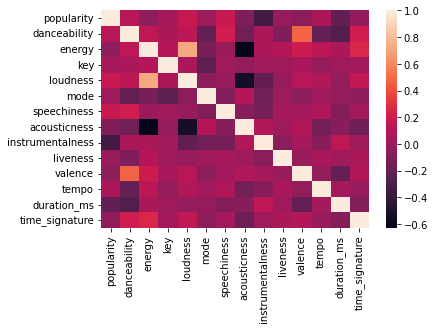

In [4]:
# Check individual correlations between audio features and popularity.
df_corr = df.corr()
sns.heatmap(df_corr)

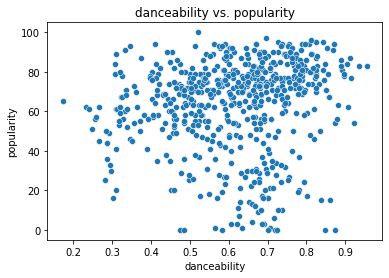

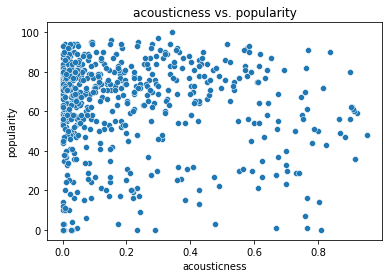

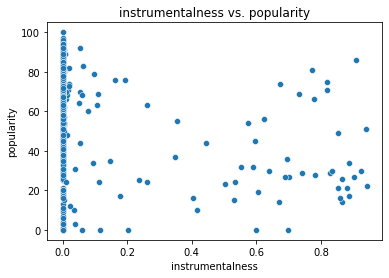

In [5]:
# Plot arbitrary audio features against popularity.
strongest_features = ["danceability", "acousticness", "instrumentalness"]

for feature in strongest_features:
    popularity = df.filter(["popularity"])["popularity"]
    x = df.filter([feature])[feature]

    sns.scatterplot(x=x, y=popularity)
    plt.title(f"{feature} vs. popularity")
    plt.show()

In [6]:
# TODO: check over this
def get_bin(popularity, bin_size=10):
    """ Function:   get_bin
        Parameters: popularity, integer popularity from Spotify
                    bin_size, integer, the size of a bin
        Return:     integer, the bin of this popularity
    """
    return math.ceil(popularity / float(bin_size))

In [7]:
# Section off the X and y dataframes for classification.
X = df.copy()
X = X.drop(["track", "artist", "popularity"], axis=1)

print(X.head())

y = df.copy()
y = y.drop(["track", "artist", "popularity"], axis=1)
y["Label"] = df.apply(lambda series: get_bin(series.loc["popularity"]), axis="columns")
y = y.filter(["Label"])

print(y.head())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.520   0.731    6    -5.338     0       0.0557        0.3420   
1         0.761   0.525   11    -6.900     1       0.0944        0.4400   
2         0.935   0.807   11    -3.838     0       0.1140        0.0514   
3         0.591   0.764    1    -5.484     1       0.0483        0.0383   
4         0.728   0.783   11    -4.424     0       0.2660        0.2370   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.001010    0.3110    0.662  173.930       167303               4  
1          0.000007    0.0921    0.531   80.870       238805               4  
2          0.000000    0.3490    0.813  106.017       173182               4  
3          0.000000    0.1030    0.478  169.928       141806               4  
4          0.000000    0.4340    0.555   77.011       173381               4  
   Label
0     10
1      9
2      9
3     10
4     10


In [8]:
'''In the analysis of this dataset, our goal is to predict the popularity of a song given its spotify acoustic
features. Our first go at solving this problem will be to implement a classification model that will assign a song
into a predetermined "popularity score" bucket. We will start with a base case classification model, check results,
and if our model underperforms pivot to exploring other models that could answer the above question better.''' 


###Split Data into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30)

#Build out base case classification model 

knn_base = KNeighborsClassifier(n_neighbors=5)
knn_base.fit(X_train, y_train)
y_pred_base = knn_base.predict(X_test)

print("Train Score", knn_base.score(X_train, y_train))
print("Test Score", knn_base.score(X_test, y_test))

#Output test results of first 10 test entries
knn_base.predict(X_test)[:11]

'''In the inital build out of our model - our testing accuracy score is low at 19.868%. Even our training set 
accuracy score was low at 39.56%. The next step would be to scale our data because ...'''

Train Score 0.4177777777777778
Test Score 0.17218543046357615


/Users/andrewleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


'In the inital build out of our model - our testing accuracy score is low at 19.868%. Even our training set \naccuracy score was low at 39.56%. The next step would be to scale our data because ...'

In [9]:
#Minmax scaling for greater model accuracy 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Create a new KNN classification model with the scaled X data and report accuracy score: 

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("Train Score", knn_scaled.score(X_train_scaled, y_train))
print("Test Score", knn_scaled.score(X_test_scaled, y_test))

#Output test results of first 10 test entries
knn_scaled.predict(X_test_scaled)[:11]

'''Our accuracy for both testing and training improved after scaling our features. Test Score at 22.517% and 
training score at 44.22% accuracy. These scores, however, are still low. The next step is to optimize KNN parameters 
using a GridSearch'''

Train Score 0.48
Test Score 0.1986754966887417


/Users/andrewleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


'Our accuracy for both testing and training improved after scaling our features. Test Score at 22.517% and \ntraining score at 44.22% accuracy. These scores, however, are still low. The next step is to optimize KNN parameters \nusing a GridSearch'

In [11]:
#Optimize the base KNN classifier model using grid search:

grid_params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21],'weights':['uniform','distance'],'metric':['euclidean','manhattan','chebyshev']}

gs = GridSearchCV(KNeighborsClassifier(),grid_params,scoring = 'accuracy', verbose = 1, cv = 5, n_jobs = -1)

gs_results = gs.fit(X_train,y_train)

gs_results.best_score_
gs_results.best_estimator_
gs_results.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/andrewleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/andrewleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/andrewleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/andrewleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was pas

  return self._fit(X, y)
/Users/andrewleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/andrewleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/andrewleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/andrewleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: 

{'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}

In [12]:
#Implement the KNN classification algorithm with optimal parameters found through the above GRIDSEARCH

#KNN Model - parameter tuning

knn_tuned = KNeighborsClassifier(n_neighbors=11, metric = 'euclidean', weights = 'uniform')
knn_tuned.fit(X_train_scaled, y_train)
y_pred_tuned = knn_tuned.predict(X_test_scaled)

print("Train Score", knn_tuned.score(X_train_scaled, y_train))
print("Test Score", knn_tuned.score(X_test_scaled, y_test))

#Output test results of first 10 test entries
knn_tuned.predict(X_test_scaled)[:11]

'''Our results show a slight improvement in our test accuracy, now at 26.49%, an increase of around 4%, but our 
training score decreased to 39.33% in this case. Indicating that without parameter tuning, our model overfit 
the data.'''

Train Score 0.41333333333333333
Test Score 0.26490066225165565


/Users/andrewleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
 change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/andrewleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/andrewleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/andrewleung/opt/anaconda3/lib/python3.9/site-package

'Our results show a slight improvement in our test accuracy, now at 26.49%, an increase of around 4%, but our \ntraining score decreased to 39.33% in this case. Indicating that without parameter tuning, our model overfit \nthe data.'

In [13]:
'''At this point, we know that a KNN classification model yields low accuracy scores. In order to predict popularity
our group will now try to assess the accuracy of regression based models. These models wil aim to predict a specific 
popularity score rather than trying to group a song into a 'popularity bucket' '''

# Section off the X and y dataframes for regression.
X_reg = df.copy()
X_reg = X_reg.drop(["track", "artist", "popularity"], axis=1)

print(X_reg.head())

y_reg = df.copy()
y_reg = y_reg.drop(["track", "artist"], axis=1)
y_reg = y_reg.filter(["popularity"])

print(y_reg.head())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.520   0.731    6    -5.338     0       0.0557        0.3420   
1         0.761   0.525   11    -6.900     1       0.0944        0.4400   
2         0.935   0.807   11    -3.838     0       0.1140        0.0514   
3         0.591   0.764    1    -5.484     1       0.0483        0.0383   
4         0.728   0.783   11    -4.424     0       0.2660        0.2370   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.001010    0.3110    0.662  173.930       167303               4  
1          0.000007    0.0921    0.531   80.870       238805               4  
2          0.000000    0.3490    0.813  106.017       173182               4  
3          0.000000    0.1030    0.478  169.928       141806               4  
4          0.000000    0.4340    0.555   77.011       173381               4  
   popularity
0         100
1          90
2          83
3          94
4    

In [14]:
###Split Data into training and test 

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, random_state = 30)

In [15]:
#Minmax scaling for greater model accuracy 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train_reg)

X_train_scaled_reg = scaler.transform(X_train_reg)
X_test_scaled_reg = scaler.transform(X_test_reg)

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score

# evaluate 5 different algorithms
estimators = {"Linear Regression": LinearRegression(),
              "Ridge": Ridge(),
              "Lasso": Lasso(),
              "k-Nearest Neighbor": KNeighborsRegressor(),
              "Support Vector Machine": LinearSVR(max_iter=1000000)}

def regressors_percentage_split():
    for name, est in estimators.items():
        est.fit(X=X_train_scaled_reg, y=y_train_reg)
        print(f'{name}:\n')
        print(f'\tR-squared value for training set:  {r2_score(y_train_reg, est.predict(X_train_scaled_reg))}')
        print(f'\tR-squared value for testing set:  {r2_score(y_test_reg, est.predict(X_test_scaled_reg))}')
        
regressors_percentage_split()

Linear Regression:

	R-squared value for training set:  0.2160066181006003
	R-squared value for testing set:  0.1957920507229688
Ridge:

	R-squared value for training set:  0.21362119365640853
	R-squared value for testing set:  0.2044301021935413
Lasso:

	R-squared value for training set:  0.0473550896707946
	R-squared value for testing set:  0.07258720162000432
k-Nearest Neighbor:

	R-squared value for training set:  0.32573175925444475
	R-squared value for testing set:  0.16316963278071883
Support Vector Machine:

	R-squared value for training set:  0.04812914813644398
	R-squared value for testing set:  0.05959856965639565


/Users/andrewleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [17]:
### Use RFE Feature Selection to optimize the model 

from sklearn.metrics import mean_squared_error
# feature selection, evaluate with r squared score and mse

def RFE_feature_selection():
    select = RFE(DecisionTreeRegressor(random_state=3000), n_features_to_select=5)
    select.fit(X_train_scaled_reg, y_train)
    x_train_selected = select.transform(X_train_scaled_reg)
    print('Selected features after RFE:\n', X_reg.columns[select.support_])
    x_test_selected = select.transform(X_test_scaled_reg)
    model = KNeighborsRegressor().fit(X=x_train_selected, y=y_train)
    print('Regression performance with selected features:\n')
    print('\tR-squared value for training set:',{r2_score(y_train, model.predict(x_train_selected))})
    
    print(f'\tR-squared value for test set:' ,{r2_score(y_test, model.predict(x_test_selected))})
    
    print('Training set mean square error with the best parameters: ', mean_squared_error(y_train, model.predict(x_train_selected)))
          
    print('Test set mean square error with the best parameters: ', mean_squared_error(y_test, model.predict(x_test_selected)))
    print(select.estimator_.feature_importances_)
          
    return x_train_selected, x_test_selected

X_train_selected, X_test_selected = RFE_feature_selection()

Selected features after RFE:
 Index(['danceability', 'energy', 'acousticness', 'instrumentalness',
       'duration_ms'],
      dtype='object')
Regression performance with selected features:

	R-squared value for training set: {0.3469177155230748}
	R-squared value for test set: {0.1429938820409271}
Training set mean square error with the best parameters:  3.4315555555555557
Test set mean square error with the best parameters:  4.9886092715231785
[0.14881607 0.21718752 0.15741058 0.22250752 0.2540783 ]
